# **Bank Customer Churn Model**

-------------

## **Objective**

- Data Encoding
- Feature Handling 
- Handling Imbalance data
- Random over sampling
- Random under Sampling
- Support Vector machine Classifier
- Grid Search for Hyperparamete Tunning

## **Data Source**

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [4]:
data = pd.read_csv('churn_prediction_data.csv')

## **Describe Data**

In [6]:
data = data.drop(['RowNumber'],axis=1)

In [7]:
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [20]:
data = data.rename(columns={'Exited':'churn'})

In [21]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'churn'],
      dtype='object')

In [22]:
data.shape

(10000, 13)

In [23]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [24]:
data.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
churn                  2
dtype: int64

In [25]:
data.isnull().count()

CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
churn              10000
dtype: int64

In [27]:
data.duplicated('CustomerId').sum()

0

In [28]:
data = data.set_index('CustomerId')

In [29]:
data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  churn            10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [31]:
data.nunique()

Surname            2932
CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
churn                 2
dtype: int64

## **Data Visualization**

Text(0.5, 1.0, 'Distribution of Country')

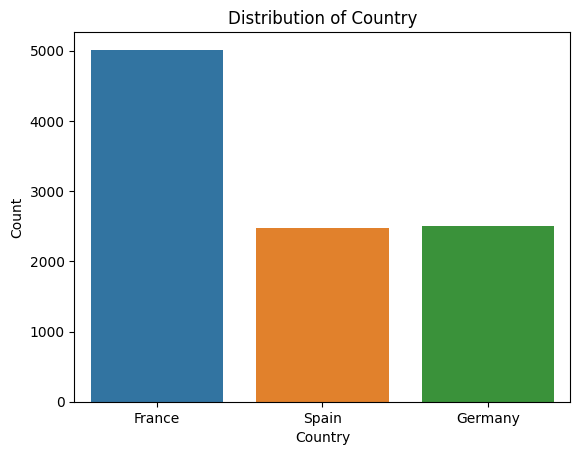

In [32]:
sns.countplot(x = 'Geography', data = data )
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Country')

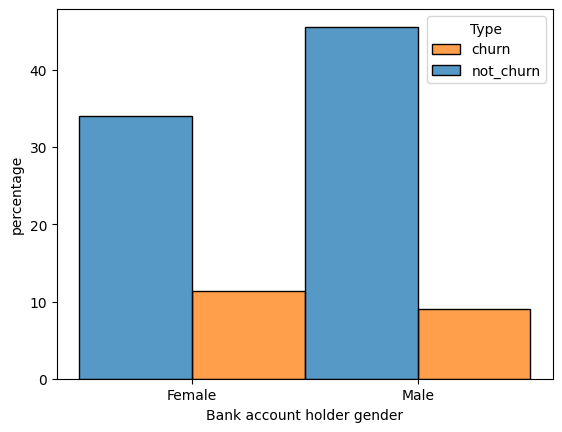

In [38]:
ax = sns.histplot(x = 'Gender', data = data, hue = 'churn',stat= 'percent', multiple='dodge') #,stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('percentage')
ax.set_xlabel('Bank account holder gender')
plt.legend(title='Type',labels = ['churn','not_churn'])


In [55]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [50]:
data.groupby(['churn','Gender']).count()

Surname  CreditScore  Geography   Age  Tenure  Balance  \
churn Gender                                                           
0     Female     3404         3404       3404  3404    3404     3404   
      Male       4559         4559       4559  4559    4559     4559   
1     Female     1139         1139       1139  1139    1139     1139   
      Male        898          898        898   898     898      898   

              NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
churn Gender                                                             
0     Female           3404       3404            3404             3404  
      Male             4559       4559            4559             4559  
1     Female           1139       1139            1139             1139  
      Male              898        898             898              898

In [47]:
data.groupby(['churn'])['Gender'].count()

churn
0    7963
1    2037
Name: Gender, dtype: int64

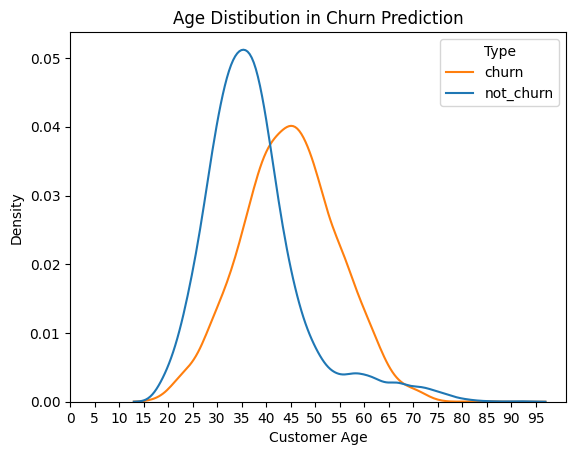

In [52]:
ax = sns.kdeplot(x = 'Age', data = data, hue = 'churn', common_norm=False, common_grid=True)
ax.set_xlabel('Customer Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,100,5))
plt.title('Age Distibution in Churn Prediction')
plt.legend(title = 'Type', labels = ['churn','not_churn'])

## **Data Preprocessing**

## **Define Target Variable (y) and Feature Variables (X)**

## **Train Test Split**

## **Modeling**

## **Model Evaluation**

## **Prediction**

## **Explaination**